<a href="https://colab.research.google.com/github/sim-mautner/cs1010-21t2/blob/main/tutes-and-labs/week9lab-solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Lab (4 marks)

**IMPORTANT NOTE:** The first task in this lab is simply demonstrating progress in your project. You need to do this during your week 9 lab.

The later tasks does not have to be shown to your lab demonstrator till the week 10 lab.

## Project Progress (1 mark)

Show your progress in your project to your tutor.

## Web APIs (2 mark)

The [Deck of Cards API](http://deckofcardsapi.com/) can be used to create decks of cards and draw cards from them.

Using this API and the `requests` library, shuffle *6 decks*, draw 3 cards and display them in this notebook.

**HINT**: You can display multiple images in a notebook by calling the `display()` function multiple times. It has been imported for you, as has all the other things you are likely to need. 

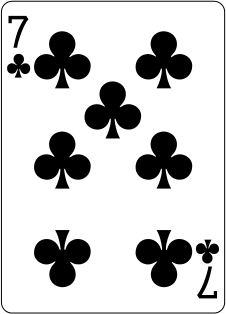

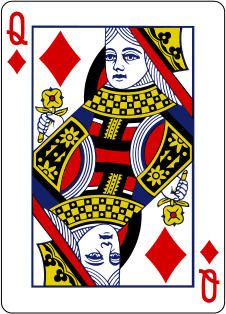

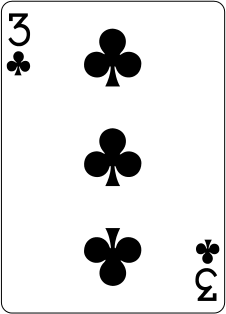

In [20]:
import requests
import json
from PIL import Image
import io
from IPython.display import display

# To get a shuffled deck of cards: http://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1
response = requests.get('http://deckofcardsapi.com/api/deck/new/shuffle/', {'deck_count':6})
response_json = json.loads(response.content)
deck_id = response_json['deck_id']

# To draw a card from the deck: http://deckofcardsapi.com/api/deck/<<deck_id>>/draw/?count=2
response = requests.get(f'http://deckofcardsapi.com/api/deck/{deck_id}/draw/', {'count':3})
response_json = json.loads(response.content)

cards = response_json['cards']

for card in cards:
  img_url = card['image']
  display(Image.open(io.BytesIO(requests.get(img_url).content)))
  

## Revision Exercise (1 mark)

The following dictionary describes a series of items for sale on an auction site. Each item has a reserve price and a series of bids. The bids are in the order they were received-- i.e. most recent and highest bid at the end.

In [21]:
auctions = {
    "lamp": {
        "reserve_price": 25,
        "bids": [
            { "bidder": "coolguy92", "bid": 5 },
            { "bidder": "xoxo_lucie", "bid": 10 },
            { "bidder": "addicted_to_ebay", "bid": 20 },
            { "bidder": "coolguy92", "bid": 30 }
        ]
    },
    "figurine": {
        "reserve_price": 10,
        "bids": [
            { "bidder": "user1234", "bid": 2 },
            { "bidder": "xoxo_lucie", "bid": 5 }
        ]
    },
    "pokemon card": {
        "reserve_price": 500,
        "bids": [
            { "bidder": "ihavetoomuchmoney", "bid": 500 },
            { "bidder": "addicted_to_ebay", "bid": 600 }
        ]
    },
    "holiday package": {
        "reserve_price": 1500,
        "bids": []
    },
}

Write a function, `reserve_met()`, that returns a list of all the items that have met their reserve price. All the items returned should have a bid that is greater than or equal to the reserve price.

In [24]:
def reserve_met():
  results = []
  for auction,auction_data in auctions.items():
    bids = auction_data['bids']
    if len(bids) > 0 and bids[-1]['bid'] > auction_data['reserve_price']:
      results.append(auction)
  return results

Use this cell to test your function

In [25]:
assert reserve_met() == ["lamp", "pokemon card"]